<a href="https://colab.research.google.com/github/WilliamHallPortfolio/ACS_Juvenile_Justice_Project/blob/main/Copy_of_ACS_Flash_Report_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACS Flash Report Project <br>
Based on updated data (October 4th 2024) from NYC Open Data.

Dataset and data definitions can be found here: <br>
https://data.cityofnewyork.us/City-Government/Monthly-Flash-Report-indicators/2ubh-v9er/about_data

The Flash report provides monthly performance data on key ACS child welfare, child care, and juvenile justice functions such as children using vouchers for child care, child protective caseloads, and the number of admissions to detention. Each row of data in the Excel file posted to Open Data is a distinct measure in the Flash Report.The columns are the month of the data. Data are updated semiannually in September and April using data from queries of administrative data systems and data provided directly from program areas.

This project focuses on Juvenile Justice and detention rates of the youth residing in New York City. After examining the key features of the dataset, I will create an ARIMA model to attempt to predict youth detention levels in fiscal year 2025.

## Import Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/WilliamHallPortfolio/ACS_Juvenile_Justice_Project.git

fatal: destination path 'ACS_Juvenile_Justice_Project' already exists and is not an empty directory.


In [3]:
df = pd.read_csv("/content/ACS_Juvenile_Justice_Project/data/Open_Data_FLASH_Jan_2015_-_June_2024.csv")
df.head()

,Indicators,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,...,September 2023,October 2023,November 2023,December 2023,January 2024,February 2024,March 2024,April 2024,May 2024,June 2024
0,Children using vouchers for child care,"67,674","66,196","66,860","66,710","67,319","68,736","67,674","67,620","66,734",...,"65,702","66,975","68,445","70,536","72,055","74,214","74,935","76,189","76,591","77,216"
1,Children using low income vouchers for child care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"25,700","27,137","29,015","30,732","32,217","34,545","36,401","38,750","40,225","42,176"
2,SCR intakes,"5,470","4,879","6,545","5,261","5,799","4,962","3,958","3,939","4,221",...,"4,568","5,468","5,184","4,952","5,584","5,074","5,940","5,180","5,937","4,755"
3,Consolidated Investigations,"4,944","4,353","5,917","4,671","5,205","4,380","3,480","3,471","3,717",...,"3,142","3,572","3,504","3,303","3,597","3,390","3,826","3,301","3,979","3,268"
4,CARES Cases,52,46,75,58,58,44,10,8,25,...,746,"1,161","1,072",996,"1,290","1,063","1,281","1,101","1,193",727


In [4]:
# Printing dataset dimensions
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  86
Number of columns:  115


In [5]:
# Setting index to row headers
df.set_index('Indicators', inplace=True)
df.head()

,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,...,September 2023,October 2023,November 2023,December 2023,January 2024,February 2024,March 2024,April 2024,May 2024,June 2024
Indicators,,,,,,,,,,,,,,,,,,,,,
Children using vouchers for child care,"67,674","66,196","66,860","66,710","67,319","68,736","67,674","67,620","66,734","67,266",...,"65,702","66,975","68,445","70,536","72,055","74,214","74,935","76,189","76,591","77,216"
Children using low income vouchers for child care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"25,700","27,137","29,015","30,732","32,217","34,545","36,401","38,750","40,225","42,176"
SCR intakes,"5,470","4,879","6,545","5,261","5,799","4,962","3,958","3,939","4,221","5,725",...,"4,568","5,468","5,184","4,952","5,584","5,074","5,940","5,180","5,937","4,755"
Consolidated Investigations,"4,944","4,353","5,917","4,671","5,205","4,380","3,480","3,471","3,717","5,110",...,"3,142","3,572","3,504","3,303","3,597","3,390","3,826","3,301","3,979","3,268"
CARES Cases,52,46,75,58,58,44,10,8,25,63,...,746,"1,161","1,072",996,"1,290","1,063","1,281","1,101","1,193",727


In [6]:
# Transposing dataframe
df = df.T
# Head of df
df.head()

Indicators,Children using vouchers for child care,Children using low income vouchers for child care,SCR intakes,Consolidated Investigations,CARES Cases,Total Consolidated Investigations and CARES Cases,Indication Rate,% of Cases (Investigations and CARES) w/ Indicated Investigations,CPS caseload CW,CPS caseload BX,...,NSP TFCO,NSP Other,LSP Male,LSP Female,LSP Intensive Support Male/Female,Total CTH,NSP Total,LSP Total,Release from CTH Placement to Aftercare,CTH Aftercare Census
January 2015,"67,674",NaN,"5,470","4,944",52,"4,996",39.8%,NaN,11.6,12.4,...,5,NaN,NaN,NaN,NaN,176,176,NaN,16,123
February 2015,"66,196",NaN,"4,879","4,353",46,"4,399",40.1%,NaN,11.2,12.1,...,6,NaN,NaN,NaN,NaN,145,145,NaN,27,118
March 2015,"66,860",NaN,"6,545","5,917",75,"5,992",39.2%,NaN,11.5,12.7,...,3,NaN,NaN,NaN,NaN,164,164,NaN,21,122
April 2015,"66,710",NaN,"5,261","4,671",58,"4,729",38.0%,NaN,11.2,12.8,...,4,NaN,NaN,NaN,NaN,168,168,NaN,11,124
May 2015,"67,319",NaN,"5,799","5,205",58,"5,263",37.8%,NaN,11.1,12.2,...,4,NaN,NaN,NaN,NaN,173,173,NaN,11,106


In [7]:
# Converting index to Datetime
df_reset = df.reset_index()
df_reset['index'] = pd.to_datetime(df_reset['index'], format='%B %Y').dt.strftime('%Y-%m')
df_reset.set_index('index', inplace=True)
df = df_reset

In [8]:
# Converting objects to numeric dtypes
df = df.apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce') if x.name != 'Indicators' else x)
df.head()

Indicators,Children using vouchers for child care,Children using low income vouchers for child care,SCR intakes,Consolidated Investigations,CARES Cases,Total Consolidated Investigations and CARES Cases,Indication Rate,% of Cases (Investigations and CARES) w/ Indicated Investigations,CPS caseload CW,CPS caseload BX,...,NSP TFCO,NSP Other,LSP Male,LSP Female,LSP Intensive Support Male/Female,Total CTH,NSP Total,LSP Total,Release from CTH Placement to Aftercare,CTH Aftercare Census
index,,,,,,,,,,,,,,,,,,,,,
2015-01,67674,NaN,5470,4944,52,4996,NaN,NaN,11.6,12.4,...,5,NaN,NaN,NaN,NaN,176,176,NaN,16,123
2015-02,66196,NaN,4879,4353,46,4399,NaN,NaN,11.2,12.1,...,6,NaN,NaN,NaN,NaN,145,145,NaN,27,118
2015-03,66860,NaN,6545,5917,75,5992,NaN,NaN,11.5,12.7,...,3,NaN,NaN,NaN,NaN,164,164,NaN,21,122
2015-04,66710,NaN,5261,4671,58,4729,NaN,NaN,11.2,12.8,...,4,NaN,NaN,NaN,NaN,168,168,NaN,11,124
2015-05,67319,NaN,5799,5205,58,5263,NaN,NaN,11.1,12.2,...,4,NaN,NaN,NaN,NaN,173,173,NaN,11,106


In [9]:
# Stripping extra characters/spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['Children using vouchers for child care',
       'Children using low income vouchers for child care', 'SCR intakes',
       'Consolidated Investigations', 'CARES Cases',
       'Total Consolidated Investigations and CARES Cases', 'Indication Rate',
       '% of Cases (Investigations and CARES) w/ Indicated Investigations',
       'CPS caseload CW', 'CPS caseload BX', 'CPS caseload BK',
       'CPS caseload MN', 'CPS caseload QN', 'CPS caseload SI',
       'CPS caseload OSI', 'OSI Total', 'OSI Foster Care', 'OSI Day Care',
       'Article 10 filings Total', 'Court Ordered Supervision',
       'Court Order Removals', 'Other Filing Outcomes', 'Post-Filing Removals',
       'Pre-Filing Emergency Removals', 'Total new prevention cases',
       'General Prevention new cases', 'FTR new cases', 'EBM new cases',
       'Special Medical new cases', 'Total Children's Center Population',
       '0 - 3 yrs. Children's Center', '4 - 6 yrs. Children's Center',
       '7 - 10 yrs. Children's Ce

In [10]:
# Selecting columns pertinent to Juvenile Justice / Close to Home (CTH) programs
df_jj = df[['JD placements','Detention Admissions', 'Releases from Detention',
       'Population in Secure Detention',
       'Population Specialized Juvenile detention',
       'Population Non-Secure Detention', 'Average daily population AO',
       'Average daily population JD', 'Average daily population JO',
       'Average daily population pre-Raise the Age',
       'Average daily population Other', 'NSP admits', 'LSP admits',
       'CTH admissions Total', 'NSP General Male', 'NSP General Female',
       'NSP Specialized Male', 'NSP Specialized Female', 'NSP TFCO',
       'NSP Other', 'LSP Male', 'LSP Female',
       'LSP Intensive Support Male/Female', 'Total CTH', 'NSP Total',
       'LSP Total', 'Release from CTH Placement to Aftercare',
       'CTH Aftercare Census']]
df_jj

Indicators,JD placements,Detention Admissions,Releases from Detention,Population in Secure Detention,Population Specialized Juvenile detention,Population Non-Secure Detention,Average daily population AO,Average daily population JD,Average daily population JO,Average daily population pre-Raise the Age,...,NSP TFCO,NSP Other,LSP Male,LSP Female,LSP Intensive Support Male/Female,Total CTH,NSP Total,LSP Total,Release from CTH Placement to Aftercare,CTH Aftercare Census
index,,,,,,,,,,,,,,,,,,,,,
2015-01,12.0,240,201,99,NaN,64,NaN,NaN,NaN,NaN,...,5,NaN,NaN,NaN,NaN,176,176,NaN,16,123
2015-02,13.0,191,217,107,NaN,76,NaN,NaN,NaN,NaN,...,6,NaN,NaN,NaN,NaN,145,145,NaN,27,118
2015-03,18.0,258,259,93,NaN,59,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,164,164,NaN,21,122
2015-04,16.0,202,206,81,NaN,64,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,168,168,NaN,11,124
2015-05,19.0,256,242,79,NaN,75,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,173,173,NaN,11,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02,7.0,173,163,245,0.0,47,182.0,59.0,51.0,0.0,...,0,0.0,17.0,1.0,0.0,87,69,18.0,5,19
2024-03,9.0,172,175,244,0.0,54,177.0,67.0,54.0,0.0,...,0,0.0,15.0,1.0,0.0,82,66,16.0,8,24
2024-04,10.0,154,167,242,0.0,49,174.0,61.0,56.0,0.0,...,0,0.0,15.0,1.0,0.0,89,73,16.0,10,32


In [11]:
df_jj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 2015-01 to 2024-06
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   JD placements                               113 non-null    float64
 1   Detention Admissions                        114 non-null    int64  
 2   Releases from Detention                     114 non-null    int64  
 3   Population in Secure Detention              114 non-null    int64  
 4   Population Specialized Juvenile detention   70 non-null     float64
 5   Population Non-Secure Detention             114 non-null    int64  
 6   Average daily population AO                 77 non-null     float64
 7   Average daily population JD                 90 non-null     float64
 8   Average daily population JO                 90 non-null     float64
 9   Average daily population pre-Raise the Age  72 non-null     float64
 10  Average d

In [12]:
# Checking how many missing values in each attribute
df_jj.isnull().sum()

,0
Indicators,
JD placements,1
Detention Admissions,0
Releases from Detention,0
Population in Secure Detention,0
Population Specialized Juvenile detention,44
Population Non-Secure Detention,0
Average daily population AO,37
Average daily population JD,24
Average daily population JO,24


In [13]:
# Filling Nans with zeros
df_jj.fillna(0,inplace=True)

# Checking number of Nans after imputing
df_jj.isnull().sum().sum()

0

In [14]:
# Creating 'Month' and 'Fiscal Year' Columns
# July month 1 - June month 12
df_jj['Month'] = pd.to_datetime(df_jj.index, format='%Y-%m')
df_jj['Fiscal Year'] = df_jj['Month'].apply(lambda x: x.year + 1 if x.month >= 7 else x.year)
df_jj['Fiscal Month'] = df_jj['Month'].dt.month.apply(lambda x: x - 6 if x >= 7 else x + 6)


## Visualiztions
The visualizations created here will examine **Fiscal Years 2022, 2023, and 2024** <br>
for simplicity


In [15]:
# Selecting FY22, FY23, and FY24
df_years = df_jj[df_jj['Fiscal Year'].isin([2022,2023,2024])]

In [16]:
df_years.drop(columns=['JD placements','Population Specialized Juvenile detention','NSP Specialized Female',
                        'NSP TFCO','NSP Other','LSP Intensive Support Male/Female',
                        'Average daily population pre-Raise the Age'],inplace=True)

In [17]:
df_years.columns

Index(['Detention Admissions', 'Releases from Detention',
       'Population in Secure Detention', 'Population Non-Secure Detention',
       'Average daily population AO', 'Average daily population JD',
       'Average daily population JO', 'Average daily population Other',
       'NSP admits', 'LSP admits', 'CTH admissions Total', 'NSP General Male',
       'NSP General Female', 'NSP Specialized Male', 'LSP Male', 'LSP Female',
       'Total CTH', 'NSP Total', 'LSP Total',
       'Release from CTH Placement to Aftercare', 'CTH Aftercare Census',
       'Month', 'Fiscal Year', 'Fiscal Month'],
      dtype='object', name='Indicators')

In [18]:
# Selecting columns for visualization
columns = ['Detention Admissions', 'Releases from Detention',
       'Population in Secure Detention', 'Population Non-Secure Detention',
       'Average daily population AO', 'Average daily population JD',
       'Average daily population JO',
       'NSP admits', 'LSP admits', 'CTH admissions Total', 'NSP General Male',
       'NSP General Female', 'NSP Specialized Male', 'LSP Male', 'LSP Female',
       'Total CTH', 'NSP Total', 'LSP Total',
       'Release from CTH Placement to Aftercare', 'CTH Aftercare Census']

**Months in Fiscal Years:** <br>
Month 1: July <br>
Month 12: June <br>

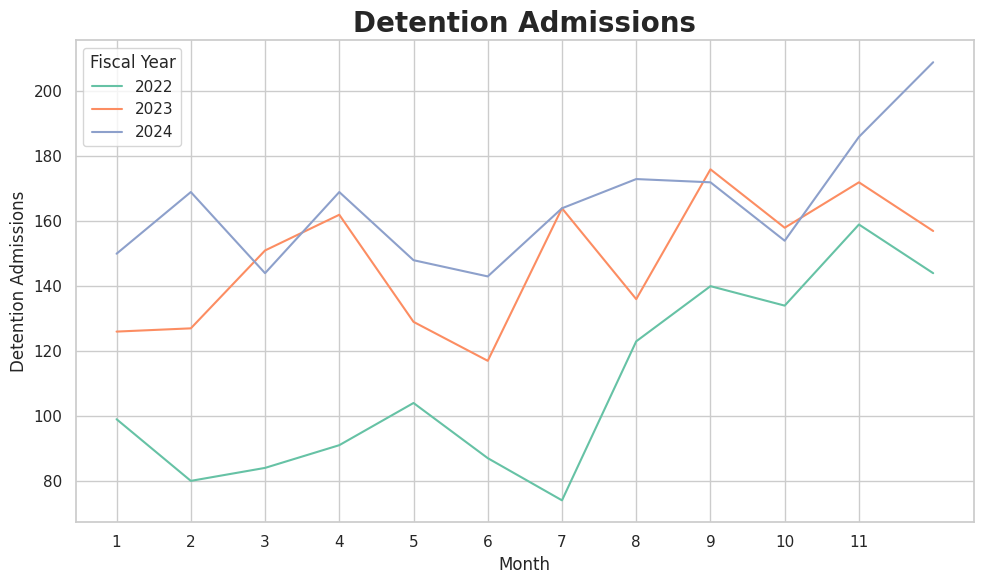

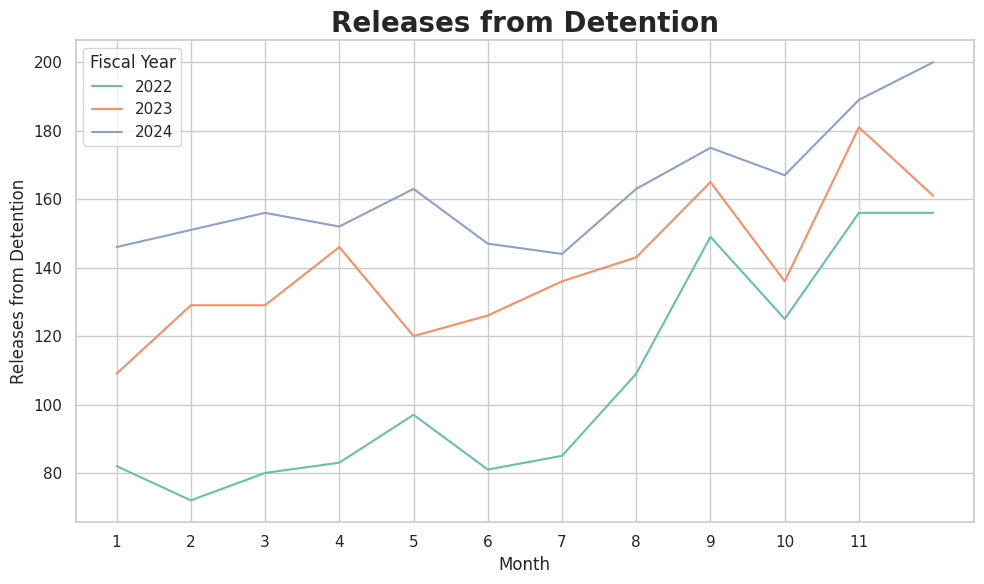

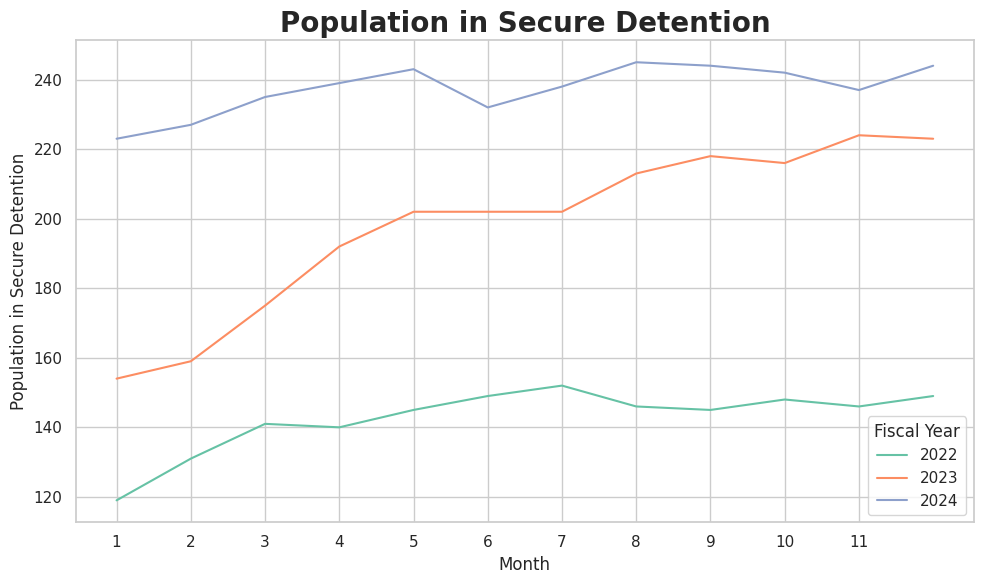

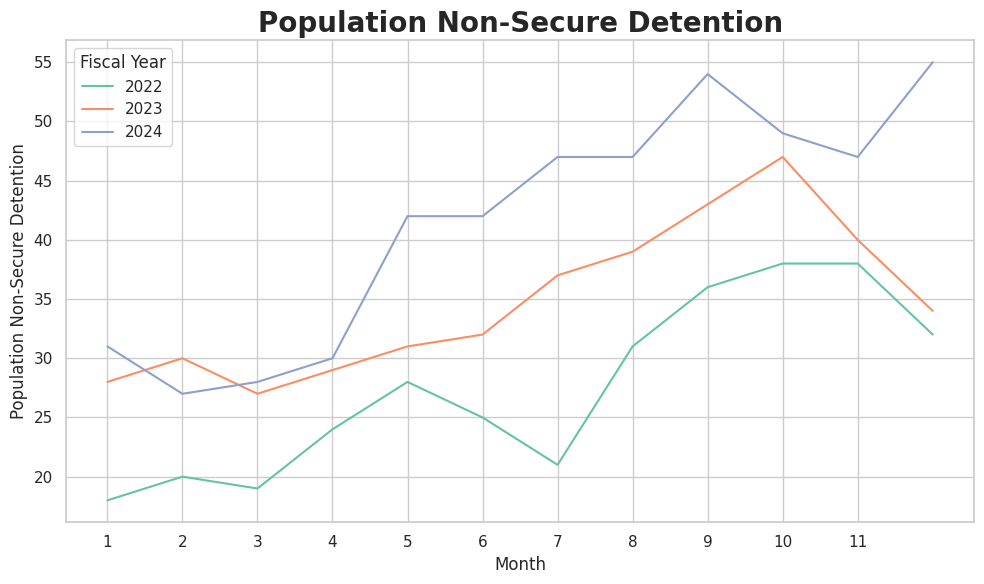

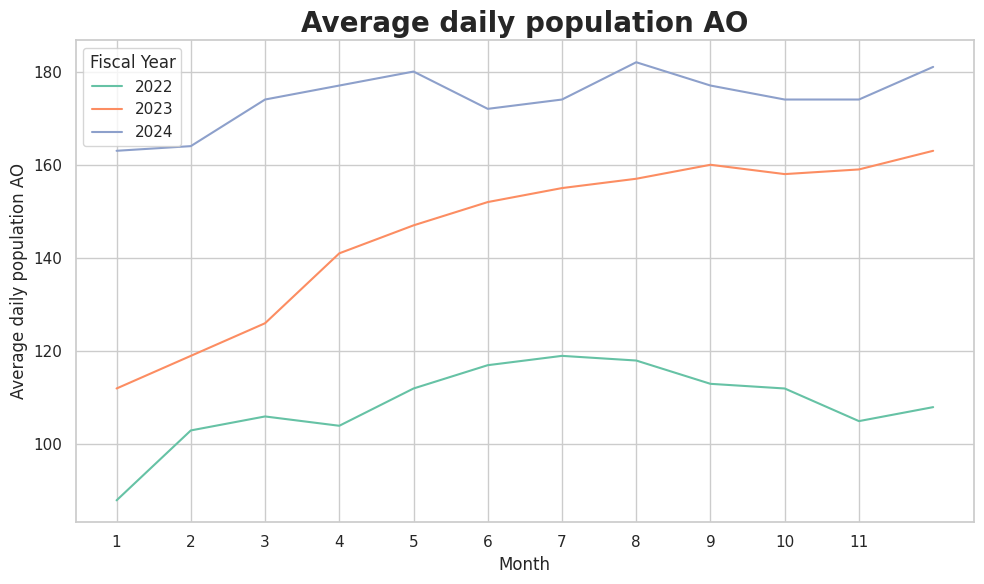

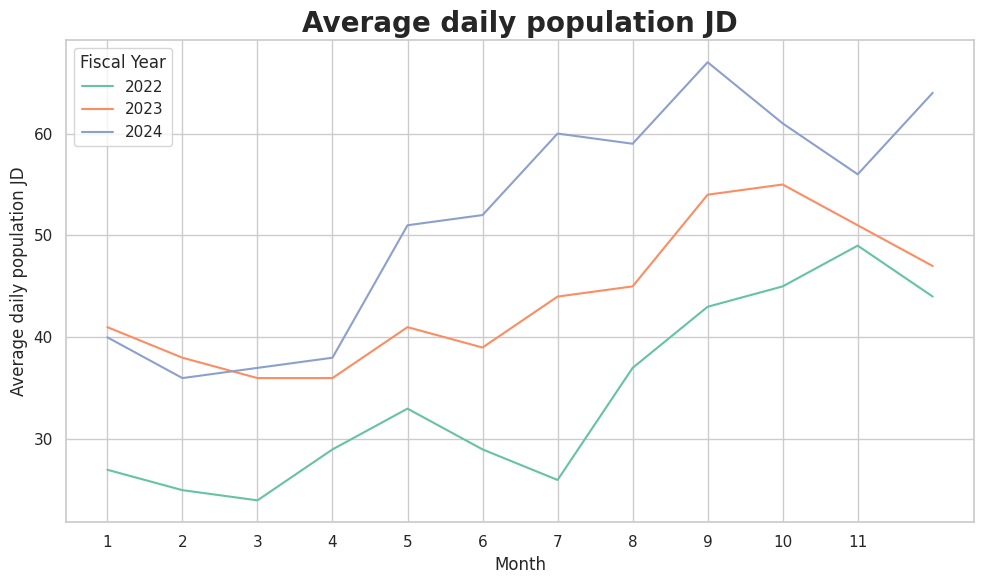

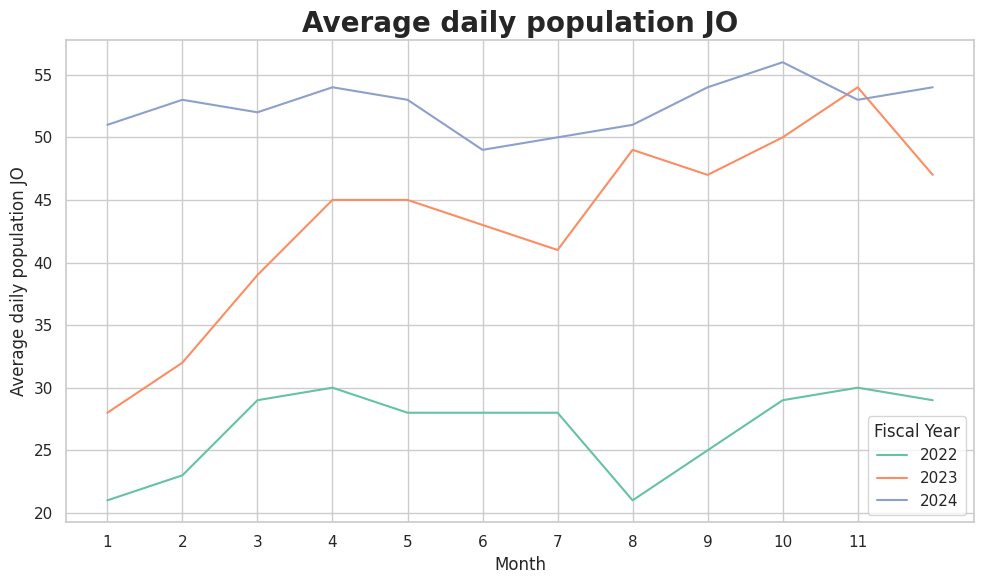

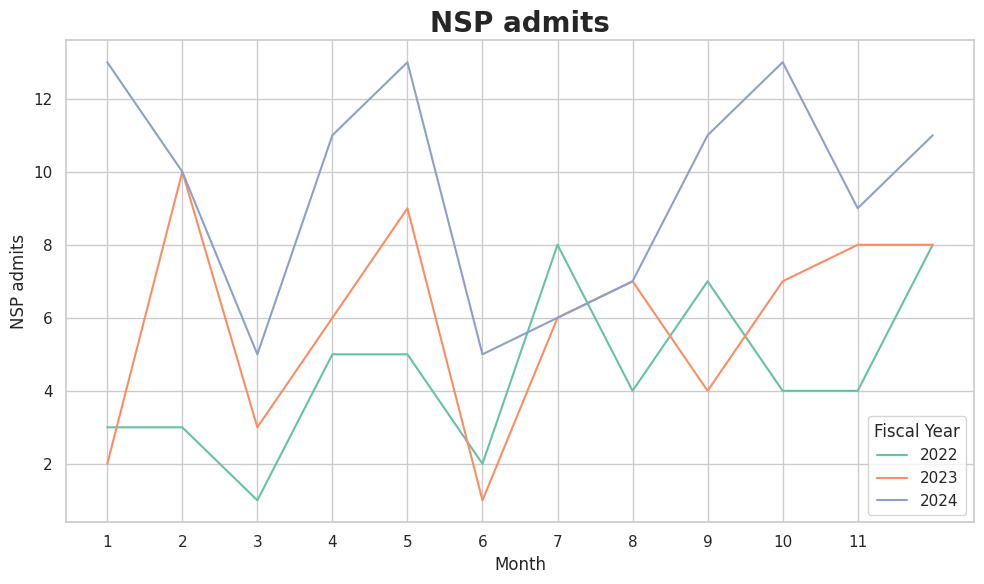

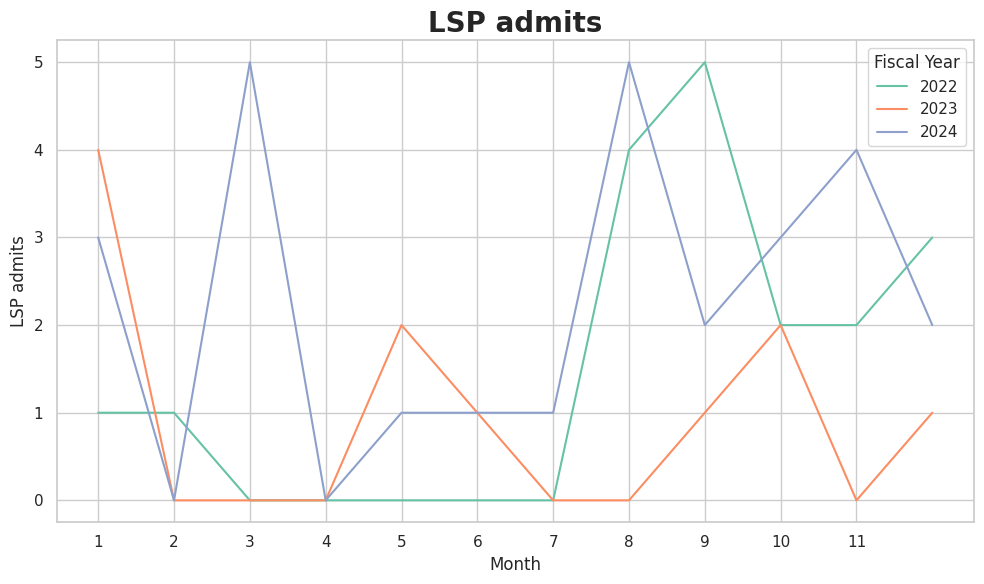

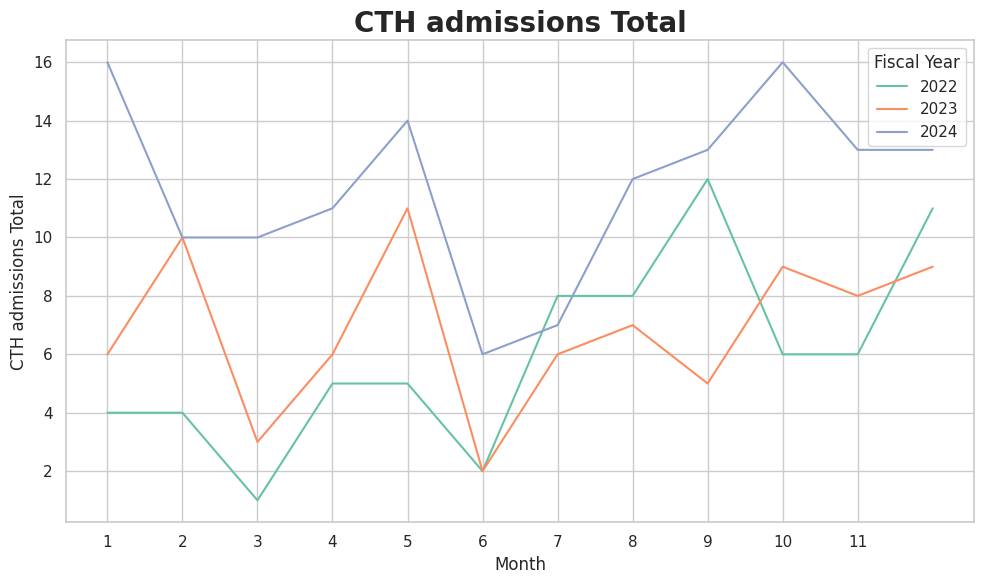

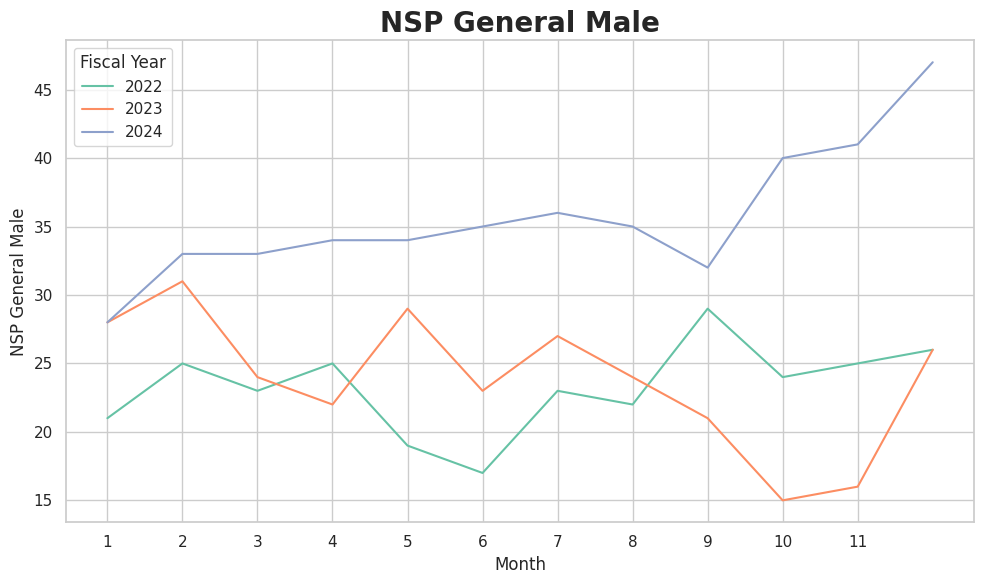

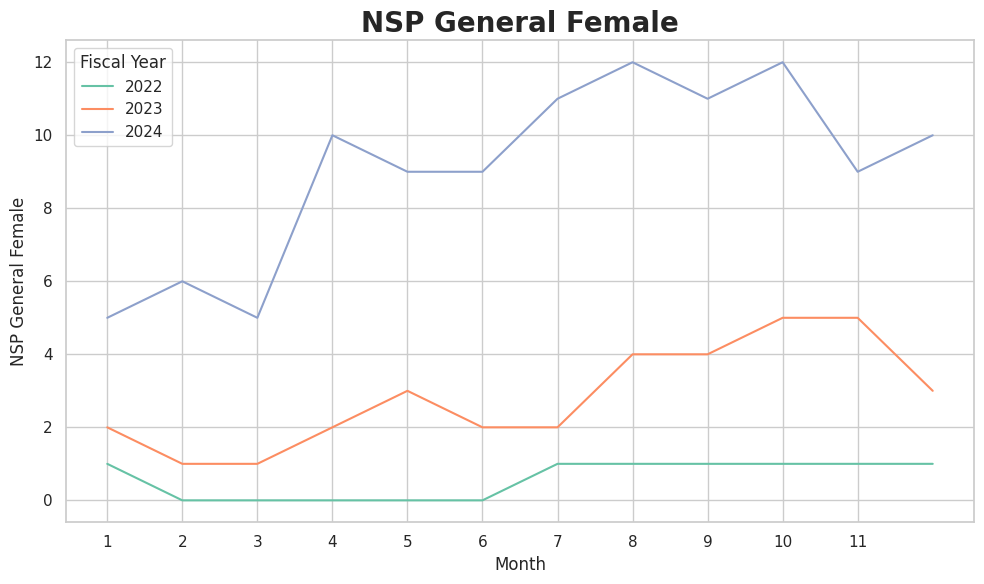

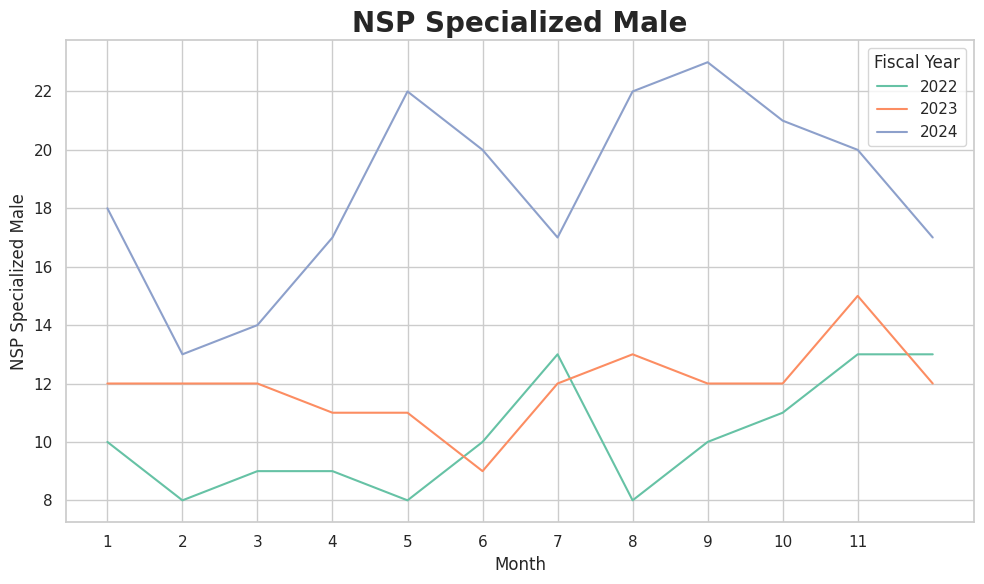

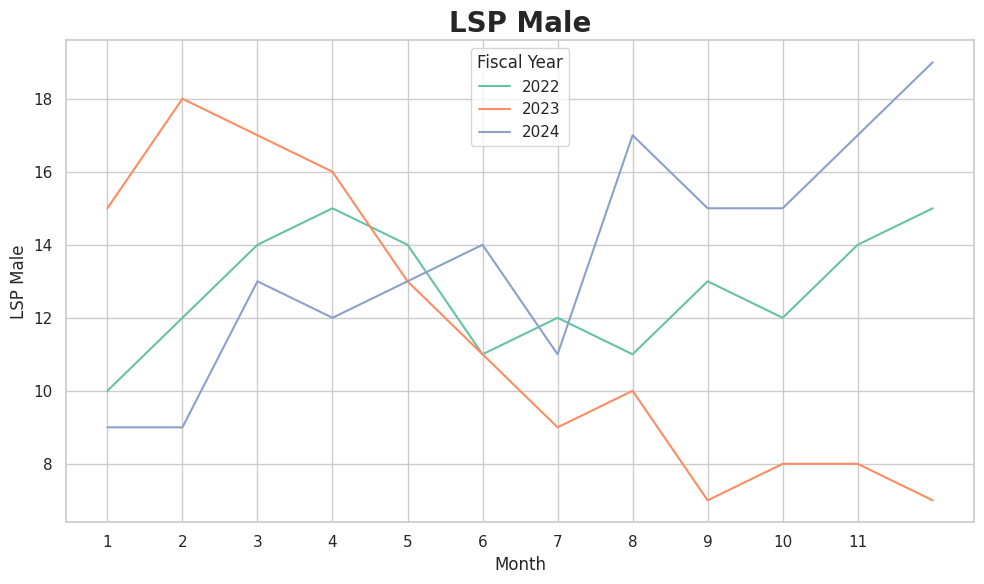

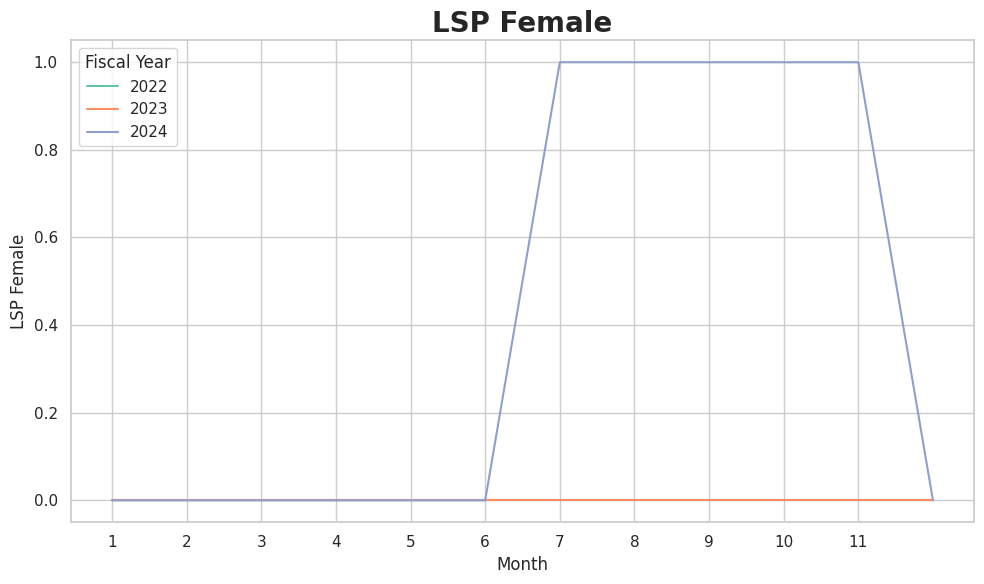

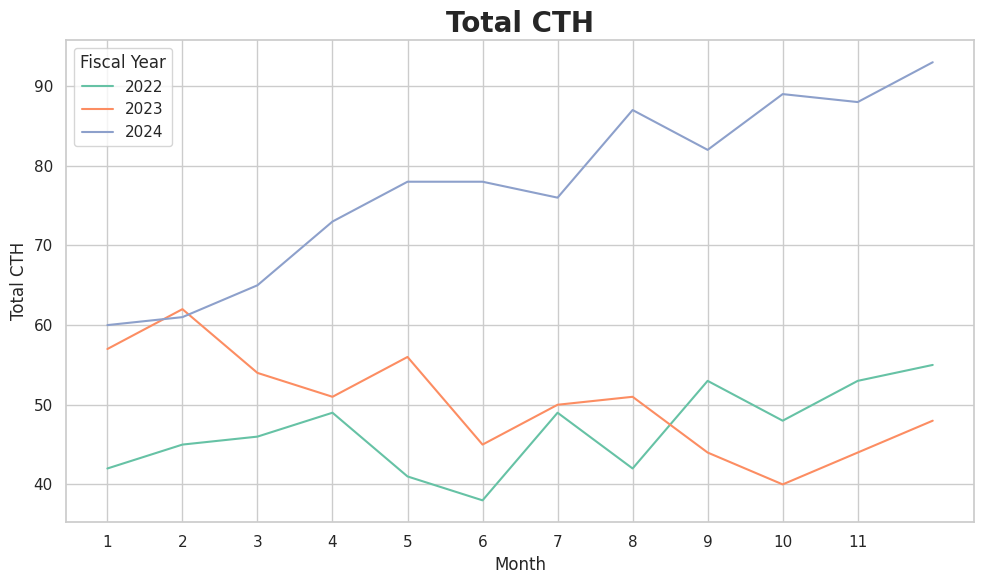

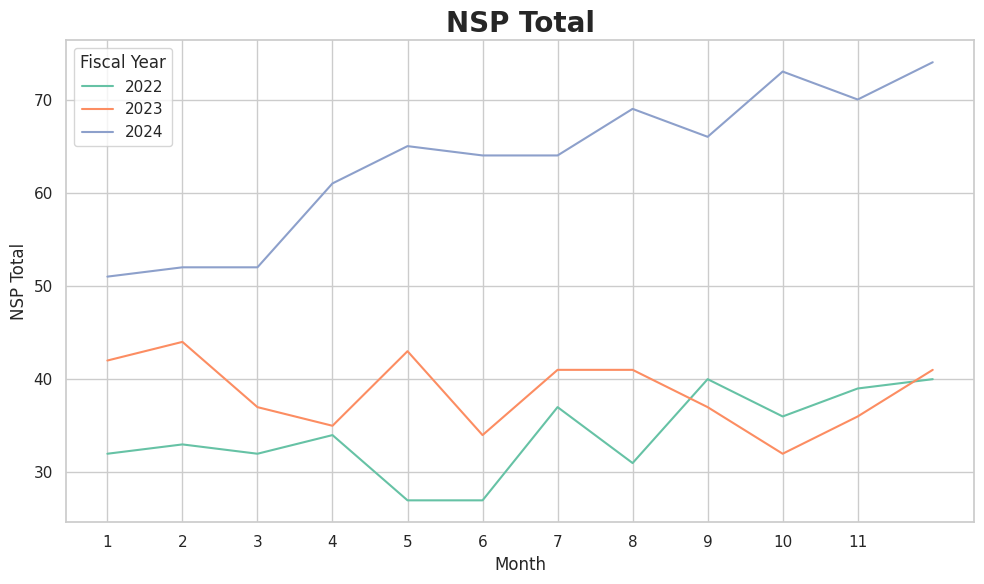

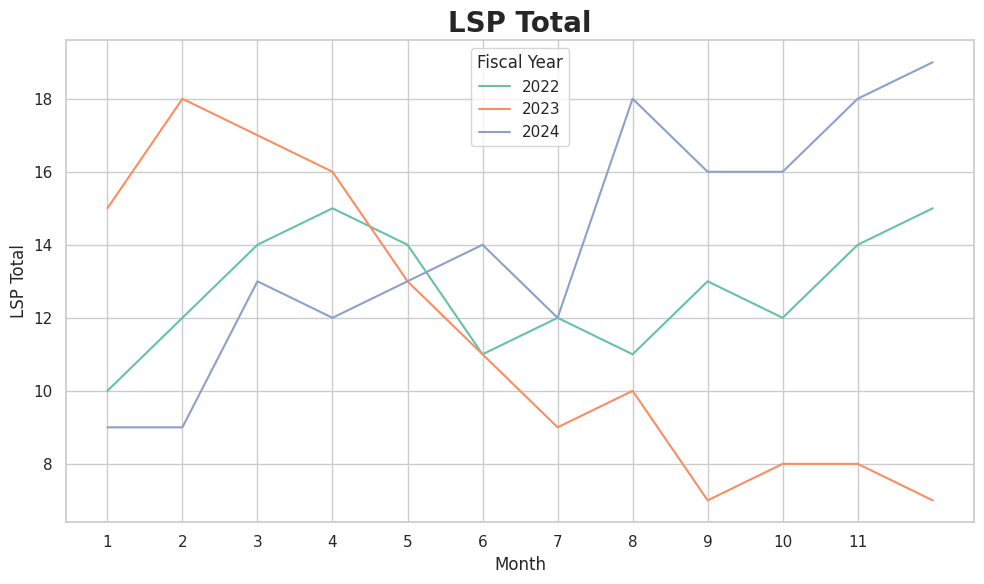

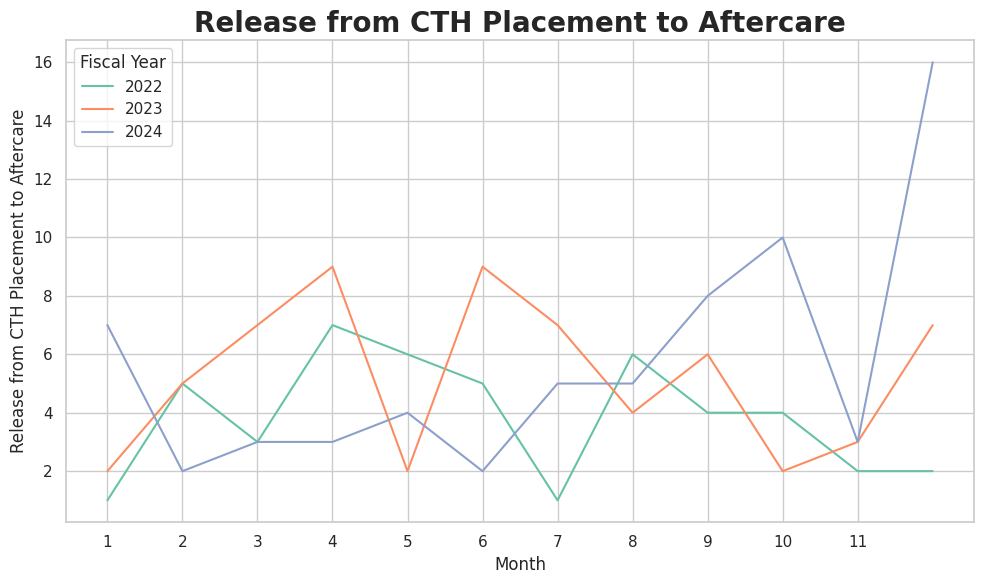

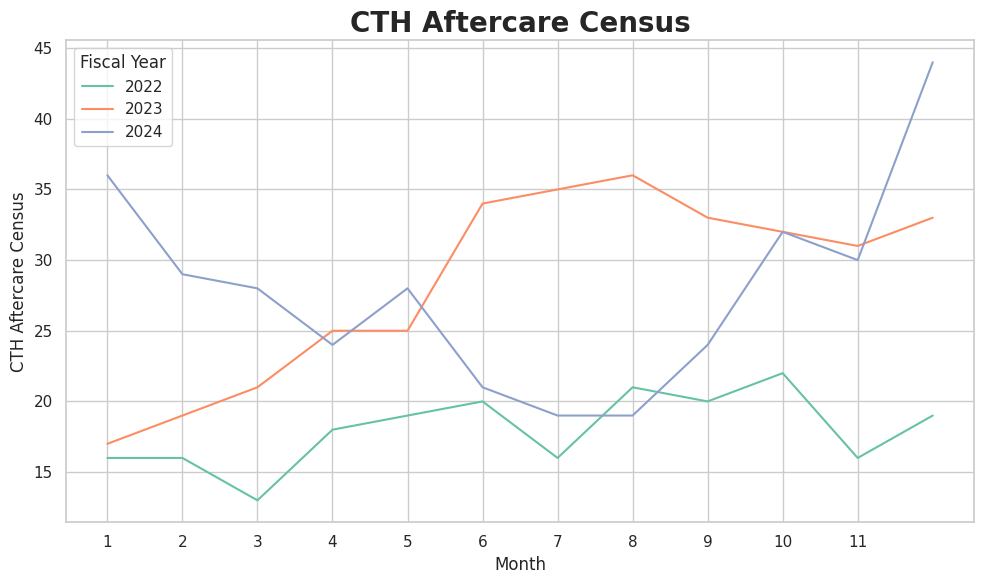

In [19]:
for i in columns:
  palette = sns.color_palette("Set2")
  sns.set(style="whitegrid")
  plt.figure(figsize=(10, 6))
  sns.lineplot(x='Fiscal Month',y= i,hue='Fiscal Year',data=df_years, palette = palette)

  plt.title(i,fontsize=20,fontweight='bold')
  plt.xticks(range(1,12,1))
  plt.xlabel('Month')
  plt.ylabel(i)
  plt.tight_layout()

## ARIMA (Autoregressive Integrated Moving Average) Model Building
### Time Series Forcasting

In this section I will try to predict how many youths will enter the Juvenile Justice system in fiscal year 2025. The ARIMA model is designed to forcast a time-series by using past data. A time series is metric that records data over regular time intervals.

#### Data Preparation

In [20]:
# Selecting 'Detention Admissions' as our target variable
data = df_years[['Month','Detention Admissions']]
data.set_index('Month',inplace=True)

# Displaying summary statistics
data.describe()

Indicators,Detention Admissions
count,36.000000
mean,140.972222
std,32.392668
min,74.000000
25%,125.250000
50%,146.000000
75%,164.000000
max,209.000000


<Axes: xlabel='Month'>

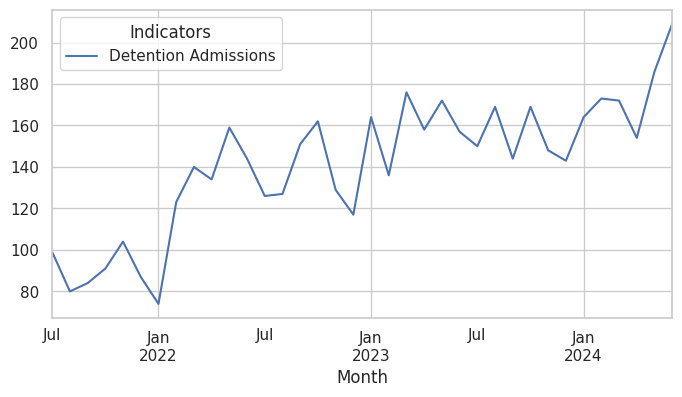

In [21]:
# Plotting the target variable
data.plot(figsize=(8,4))

<Axes: xlabel='Month'>

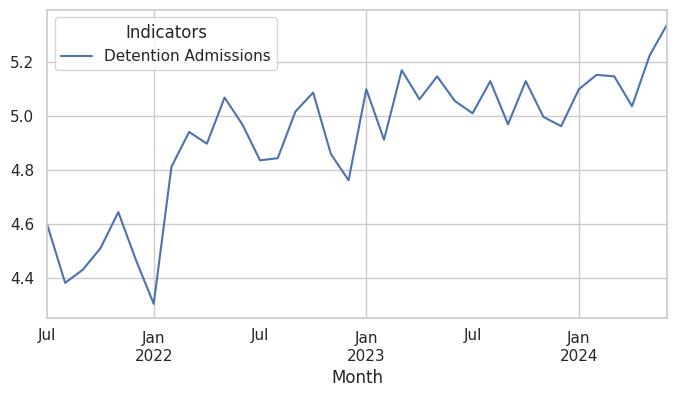

In [22]:
# Applying the log of past values to control the varience across time
import numpy as np
data = np.log(data)
data.plot(figsize=(8,4))

<Axes: ylabel='Density'>

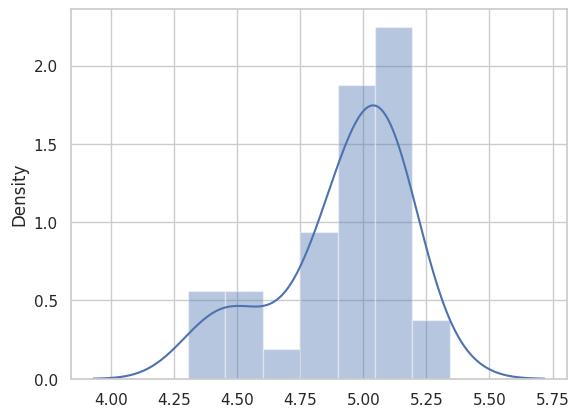

In [23]:
# Checking distribution
sns.distplot(data)

### Splitting data to train and test sets <br>
80% Training 20% Testing

In [24]:
# Splitting based on a specific date
train_size = int(len(data) * 0.8)  # Use 80% for training
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

print('Training set shape: ',train_data.shape)
print('Testing set shape: ',test_data.shape)

Training set shape:  (28, 1)
Testing set shape:  (8, 1)


## ARMA Model Workflow
1. Check for Stationarity
2. ACF plot
3. PACF plot


In this section, I will perform a *stationarity* test on the data. Stationarity implies that the statistical properties (mean, variance) of the series do not change over time. The most common method to check for stationarity is the **Augmented Dickey-Fuller (ADF) Test.** <br>
If the p value is **lower than 0.05**, we can safely assume that our data is stationary. <br>
**NOTE:** For this project I will show the results of when the data is differenced once, then the results of differencing the data twice.     

#### 1. Checking for Stationarity

In [25]:
# Checking if time series data is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.9038413439820614
p-value: 0.33025618476392715
Critical Values: {'1%': -3.6996079738860943, '5%': -2.9764303469999494, '10%': -2.627601001371742}


After using the **(ADF) test**, we see from the results that our data is not stationary

In order to use ARIMA with time series data that is non-stationary, we must apply differencing: <br>
Differencing a time series is a technique that involves subtracting the current value of <br>
a time series from its previous value, or from a lagged value.

In [26]:
# Applying the first differencing on train data
train_data_diff = train_data.diff().dropna()
train_data_diff.head()

Indicators,Detention Admissions
Month,
2021-08-01,-0.213093
2021-09-01,0.048790
2021-10-01,0.080043
2021-11-01,0.133531
2021-12-01,-0.178483


In [27]:
# Applying the first differencing on test data
test_data_diff = test_data.diff().dropna()
test_data_diff.head()

Indicators,Detention Admissions
Month,
2023-12-01,-0.034368
2024-01-01,0.137022
2024-02-01,0.053425
2024-03-01,-0.005797
2024-04-01,-0.110542


Checking for stationarity on differenced data:

In [28]:
result = adfuller(train_data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.117899617427216
p-value: 0.0009046059159629835
Critical Values: {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}


NOTE: I chose to difference the data a second time due to better performance in the ACF and PACF plots.

In [29]:
# Applying second differencing on train data
train_data_diff2 = train_data_diff.diff().dropna()
train_data_diff2.head()

Indicators,Detention Admissions
Month,
2021-09-01,0.261883
2021-10-01,0.031253
2021-11-01,0.053489
2021-12-01,-0.312014
2022-01-01,0.016640


In [30]:
# Applying the first differencing on test data
test_data_diff2 = test_data_diff.diff().dropna()
test_data_diff2.head()

Indicators,Detention Admissions
Month,
2024-01-01,0.171389
2024-02-01,-0.083597
2024-03-01,-0.059222
2024-04-01,-0.104745
2024-05-01,0.299336


Testing the data that was differenced twice:

In [31]:
result = adfuller(train_data_diff2)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.25889990597413
p-value: 0.016818632281187077
Critical Values: {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}


In [32]:
train_data_diff2.columns

Index(['Detention Admissions'], dtype='object', name='Indicators')

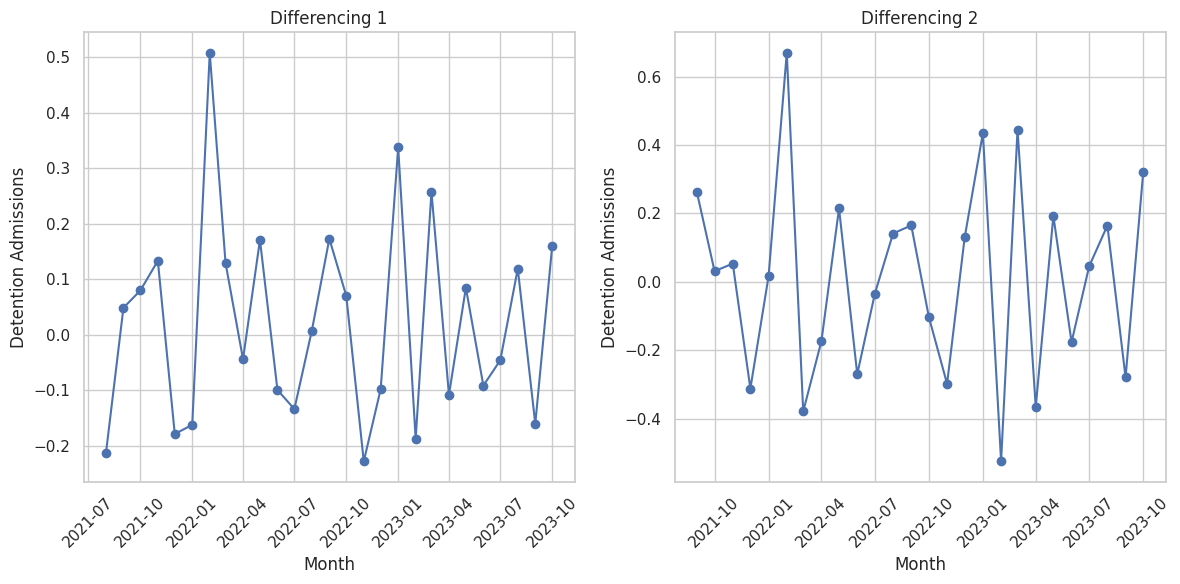

In [33]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first time series
axes[0].plot(train_data_diff.index, train_data_diff['Detention Admissions'], marker='o')
axes[0].set_title('Differencing 1')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Detention Admissions')
axes[0].tick_params(axis='x', rotation=45)

# Plot the second time series
axes[1].plot(train_data_diff2.index, train_data_diff2['Detention Admissions'], marker='o')
axes[1].set_title('Differencing 2')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Detention Admissions')
axes[1].tick_params(axis='x', rotation=45)


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### 2. ACF plot
After differencing, we use the ACF plot to identify MA terms (q) by looking for abnormal spikes after lag 1

Text(0.5, 1.0, 'Autocorrelation Function (ACF) Plot differenced twice')

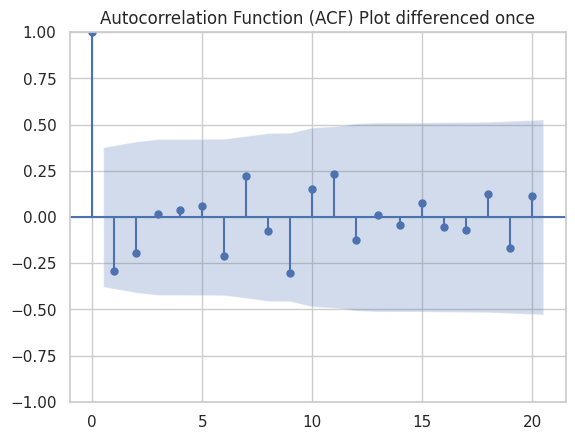

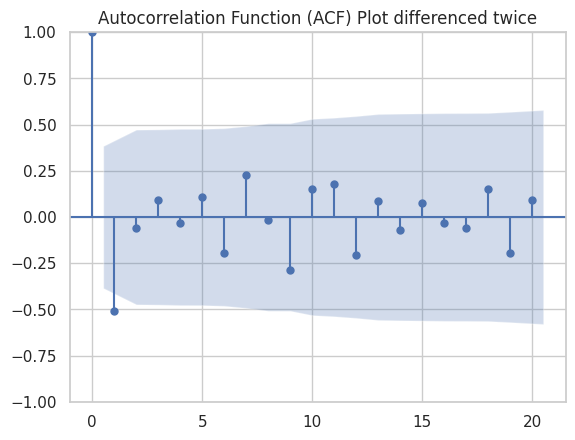

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot differenced once
plot_acf(train_data_diff, lags=20)
plt.title('Autocorrelation Function (ACF) Plot differenced once')

# ACF plot differenced twice
plot_acf(train_data_diff2, lags=20)
plt.title('Autocorrelation Function (ACF) Plot differenced twice')

Interpreting the ACF Plot: <br>
* The y-axis shows the autocorrelation values (ranging from -1 to 1).
* The x-axis shows the lag number.
* Any significant spikes *outside* the blue confidence bands indicate strong autocorrelation at that specific lag.

<br>
RESULTS:
The results of the ACF test shows that the first lag is significant after differencing the data twice. When differenced once, none of the lags appear to be significant.

#### PACF plot
PACF plots determine the AR terms (p).
Significant spikes indicate AR lags.

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF) Plot differenced twice')

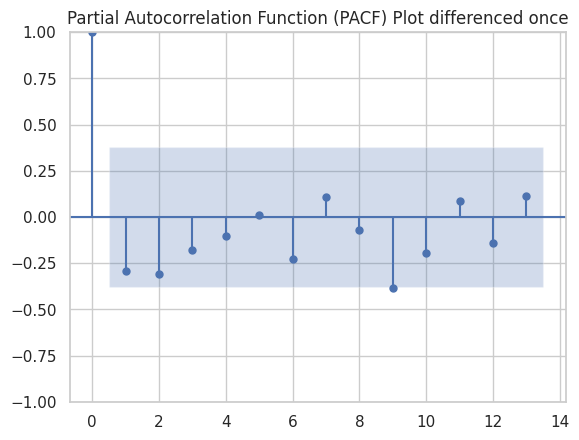

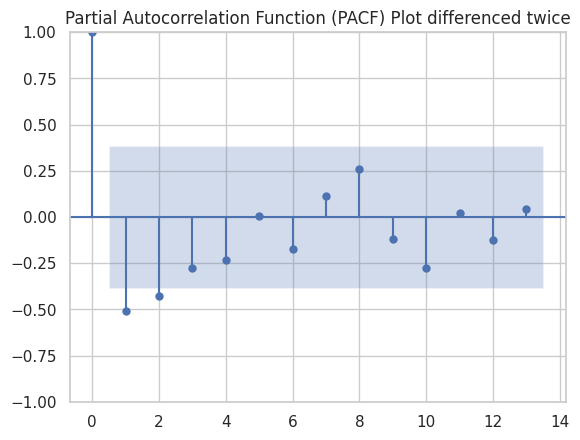

In [35]:
# PACF plot differenced once
plot_pacf(train_data_diff, lags=13)
plt.title('Partial Autocorrelation Function (PACF) Plot differenced once')

# PACF plot differenced twice
plot_pacf(train_data_diff2, lags=13)
plt.title('Partial Autocorrelation Function (PACF) Plot differenced twice')

Interpreting the PACF Plot:<br>
* The y-axis shows the partial autocorrelation values (ranging from -1 to 1).
* The x-axis shows the lag number.
* Significant spikes outside the blue confidence bands indicate a meaningful partial autocorrelation at that specific lag. These can help you determine the number of autoregressive (AR) terms to include in models like ARIMA.
<br>

RESULTS: We can observe that lag 9 in the first differencing is somewhat significant as opposed to lags 1 and 2 in the second differencing.

In [36]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

ARMIA Parameters: <br>
p: The order of the AutoRegressive (AR) term. It refers to the number of lag observations included in the model. <br>
d: The order of differencing needed to make the series stationary. (I)<br>
q: The order of the Moving Average (MA) term. It refers to the number of lagged forecast errors in the prediction equation.

In [37]:
pip install pmdarima

In [38]:
# Using Grid Search for ARMIA order parameters
import pmdarima as pm

# First differencing
p = range(0, 4)
d = range(1, 3)
q = range(0, 4)

# Selecting the best parameters for our model:
model = pm.auto_arima(train_data_diff, start_p=0, start_q=0,
                      max_p=3, max_q=3, # maximum p and q
                      d=None, # finds best "d"
                      seasonal=False,
                      trace=True, # prints progress
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)

print(model.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-14.108, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-16.171, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-14.529, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-12.872, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-14.361, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-14.397, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-13.048, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-10.890, Time=0.58 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-14.478, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12.851, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-11.992, Time=1.36 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-9.425, Time=5.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-12.901, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-10.908, Time=0.50 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-8.928, Time=0.79 sec

Best model:  ARIMA(0,0,1)(

In [39]:
# Second differencing
p = range(0, 4)
d = range(1, 3)
q = range(0, 4)

# Selecting the best parameters for our model:
model = pm.auto_arima(train_data_diff2, start_p=0, start_q=0,
                      max_p=3, max_q=3, # maximum p and q
                      d=None, # finds best "d"
                      seasonal=False,
                      trace=True, # prints progress
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)

print(model.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10.990, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4.827, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=1.39 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=0.885, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.44 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.98 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-4.877, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-0.905, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=4.27 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.91 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 13.282 se

In [40]:
from statsmodels.tsa.arima.model import ARIMA

# Differencing 1
# Fitting the ARIMA model
# p,d,q parameters from the best fit model:
model = ARIMA(train_data_diff, order=(0, 0, 1))  # Replace p, d, q with integers
model_fit = model.fit()

# Model summary
print(model_fit.summary())


                                SARIMAX Results                                 
Dep. Variable:     Detention Admissions   No. Observations:                   27
Model:                   ARIMA(0, 0, 1)   Log Likelihood                  11.306
Date:                  Fri, 18 Oct 2024   AIC                            -16.611
Time:                          14:12:28   BIC                            -12.724
Sample:                      08-01-2021   HQIC                           -15.456
                           - 10-01-2023                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0239      0.011      2.150      0.032       0.002       0.046
ma.L1         -0.6738      0.147     -4.586      0.000      -0.962      -0.386
sigma2         0.0248      0.009    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
# Differencing 2
# Fitting the ARIMA model
# p,d,q parameters from the best fit model:
model = ARIMA(train_data_diff, order=(2, 0, 3))  # Replace p, d, q with integers
model_fit2 = model.fit()

# Model summary
print(model_fit2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Detention Admissions   No. Observations:                   27
Model:                   ARIMA(2, 0, 3)   Log Likelihood                  12.744
Date:                  Fri, 18 Oct 2024   AIC                            -11.489
Time:                          14:12:30   BIC                             -2.418
Sample:                      08-01-2021   HQIC                            -8.791
                           - 10-01-2023                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0253      0.007      3.676      0.000       0.012       0.039
ar.L1         -0.3957      0.324     -1.220      0.223      -1.031       0.240
ar.L2         -0.7262      0.310    

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
# Forcasting model 1 Fiscal Year 2025:
forecast = model_fit.forecast(steps=7)
print(forecast)

2023-11-01    0.012537
2023-12-01    0.023860
2024-01-01    0.023860
2024-02-01    0.023860
2024-03-01    0.023860
2024-04-01    0.023860
2024-05-01    0.023860
Freq: MS, Name: predicted_mean, dtype: float64


In [43]:
# Forcasting model 2 Fiscal Year 2025:
forecast2 = model_fit2.forecast(steps=7)
print(forecast2)

2023-11-01    0.113383
2023-12-01    0.053617
2024-01-01   -0.044596
2024-02-01    0.032434
2024-03-01    0.073281
2024-04-01    0.001178
2024-05-01    0.000042
Freq: MS, Name: predicted_mean, dtype: float64


In [44]:
print(len(train_data_diff))
print(len(test_data_diff))
print(len(forecast))
print('\n')
print(len(train_data_diff2))
print(len(test_data_diff2))
print(len(forecast2[1:]))

27
7
7


26
6
6


## Scoring Metrics:
* MAE = Mean Absolute Error
* RMSE = Root Mean Squared Error

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data_diff, forecast)
rmse = np.sqrt(mean_squared_error(test_data_diff, forecast))

mae2 = mean_absolute_error(test_data_diff2, forecast2[1:])
rmse2 = np.sqrt(mean_squared_error(test_data_diff2, forecast2[1:]))

print(f'Model 1')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print('\n')
print(f'Model 2')
print(f'MAE: {mae2}')
print(f'RMSE: {rmse2}')

Model 1
MAE: 0.08733607555890267
RMSE: 0.10044536468206047


Model 2
MAE: 0.13281037095632828
RMSE: 0.15790484987351505


In [46]:
# Attemping to reverse differened values to original values
train_data = train_data_diff.cumsum() + train_data.iloc[0]
test_data = test_data_diff.cumsum() + test_data.iloc[0]
forecast_original = forecast.cumsum() + forecast.iloc[-1]

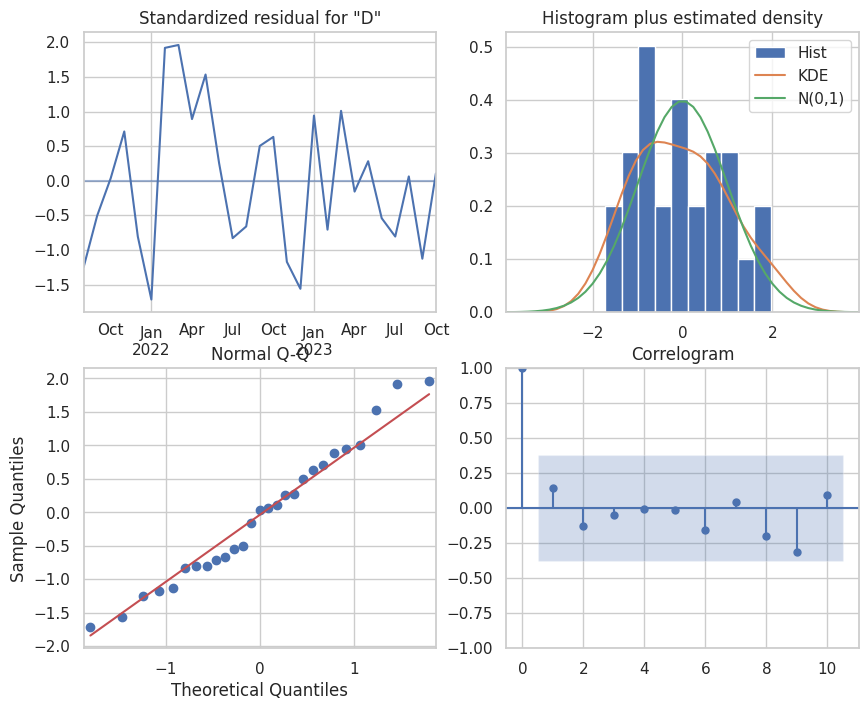

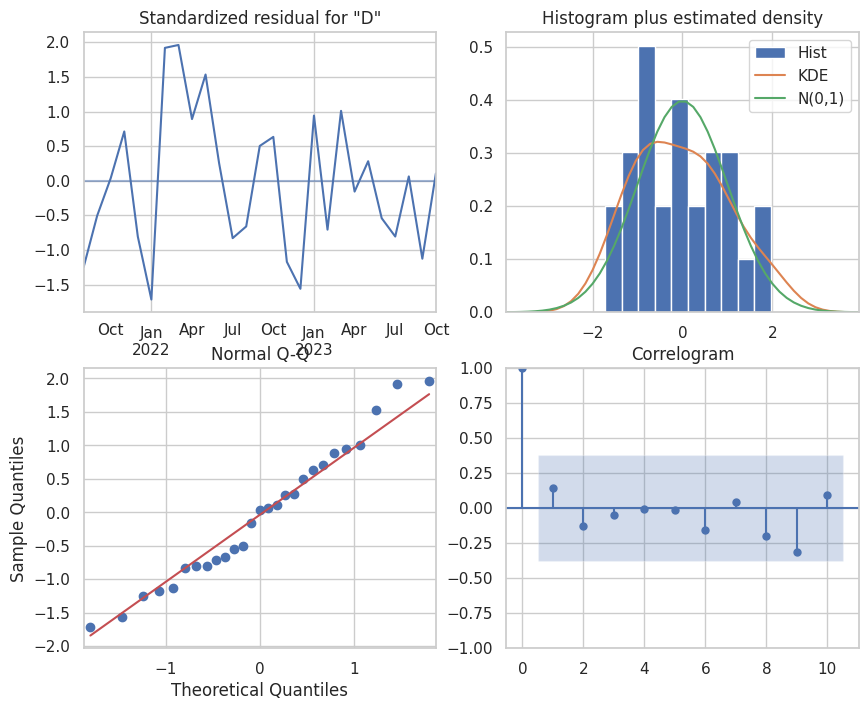

In [47]:
# Plotting residual errors
model_fit.plot_diagnostics(figsize=(10, 8))

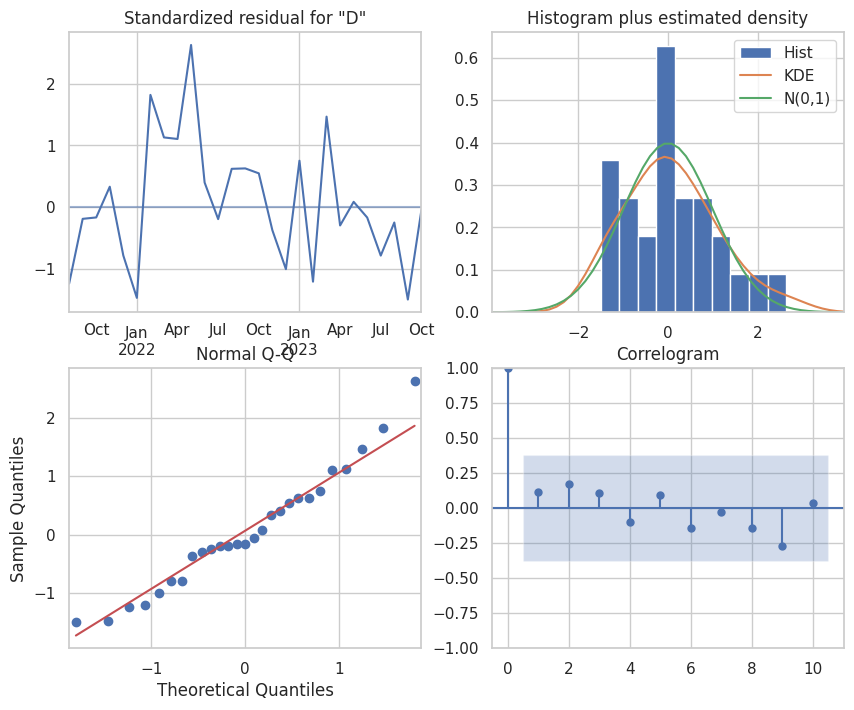

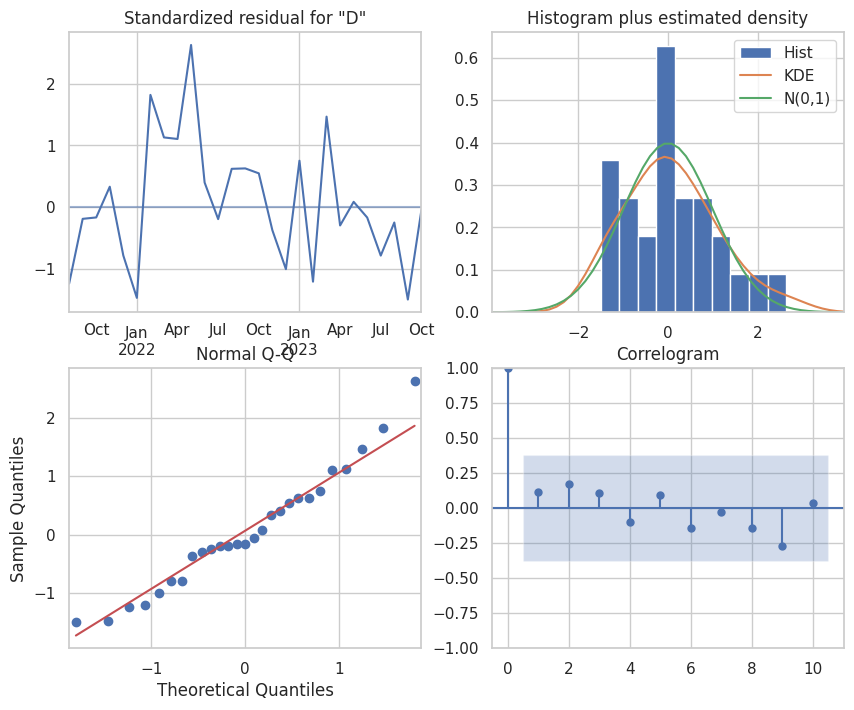

In [48]:
# Plotting residual errors
model_fit2.plot_diagnostics(figsize=(10, 8))

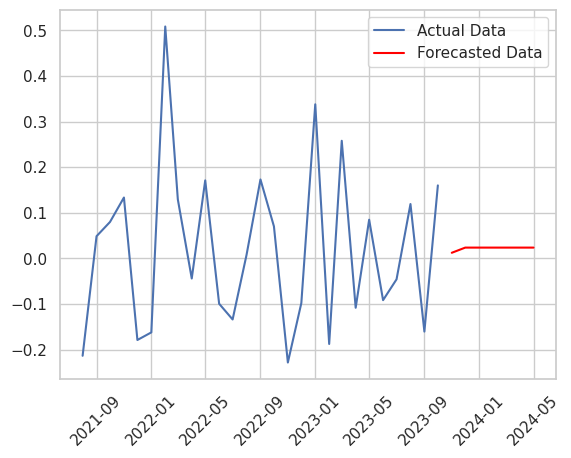

In [49]:
plt.plot(train_data_diff, label='Actual Data')
plt.plot(forecast, label='Forecasted Data', color='red')
plt.xticks(rotation=45)
plt.legend()
plt.show()

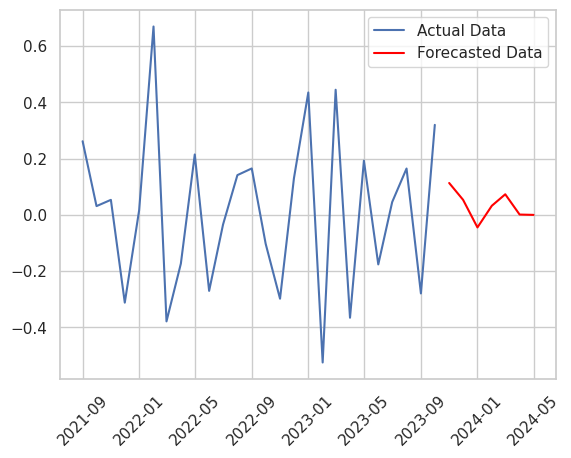

In [50]:
plt.plot(train_data_diff2, label='Actual Data')
plt.plot(forecast2, label='Forecasted Data', color='red')
plt.xticks(rotation=45)
plt.legend()
plt.show()